In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("house_Prediction_Data_Set.csv", delim_whitespace=True)
print(df.head())
print(df.info())

   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5  

C:\Users\SKANTECH\AppData\Local\Temp\ipykernel_17020\1674469689.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("house_Prediction_Data_Set.csv", delim_whitespace=True)


In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


#  Assigning proper column names  for the Dataset

columns = [
   "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

df.columns = columns

# Separating features and target
x = df.drop("MEDV", axis=1)  # All columns except target
y = df["MEDV"]             # Target column (house price)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.4 KB


In [15]:
x_train, x_test, y_train, y_test = train_test_split(
   x,y, test_size=0.2, random_state=42
)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = model.predict(x_test)

# Evaluate using R-squared and Mean Squared Error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.6522201888666173
Mean Squared Error: 19.37904111613691


In [20]:
coefficients = pd.DataFrame({
   "Feature": x.columns,
   "Coefficient": model.coef_
})

print(coefficients)

    Feature  Coefficient
0      CRIM    -0.098642
1        ZN     0.035509
2     INDUS     0.020186
3      CHAS     2.487155
4       NOX   -18.040457
5        RM     4.088551
6       AGE     0.008370
7       DIS    -1.464057
8       RAD     0.296234
9       TAX    -0.011453
10  PTRATIO    -1.001762
11        B     0.012065
12    LSTAT    -0.554132


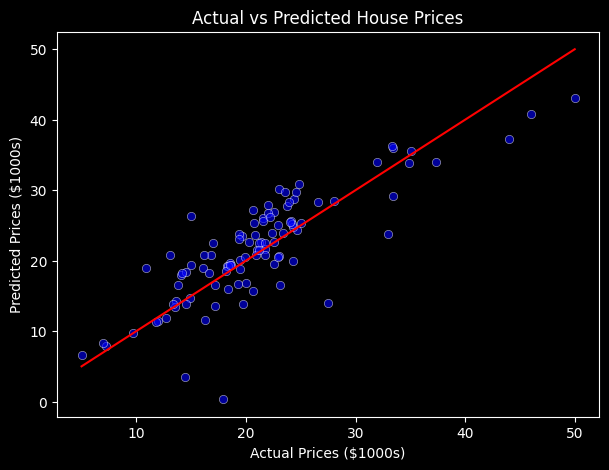

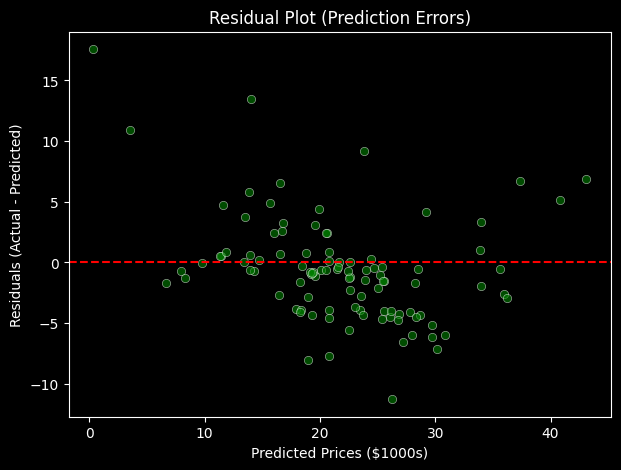

C:\Users\SKANTECH\AppData\Local\Temp\ipykernel_17020\3498438127.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coefficients_sorted, palette="coolwarm")


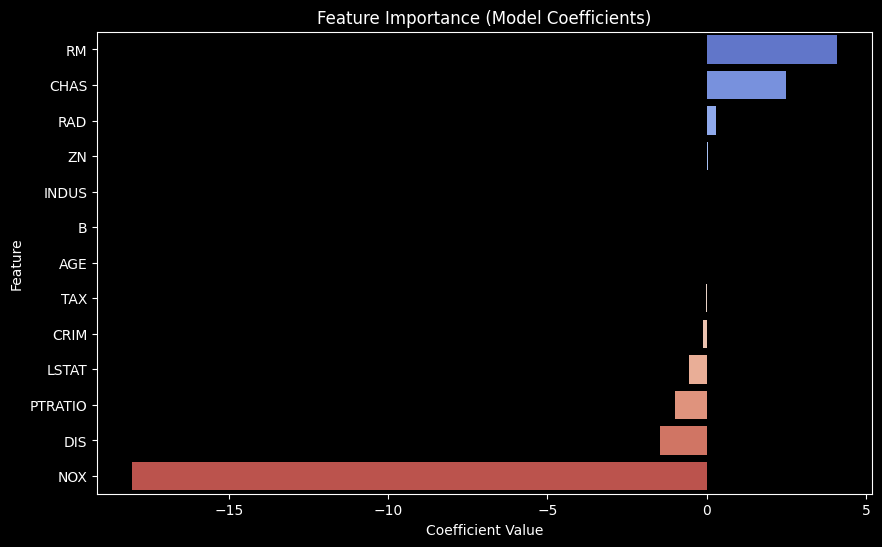

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Scatter Plot — Actual vs Predicted Prices
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')  # perfect prediction line
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.show()


# 2️⃣ Residual Plot — How far predictions deviate from real prices
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Prediction Errors)")
plt.xlabel("Predicted Prices ($1000s)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


# 3️⃣ Feature Importance — Coefficients from Linear Regression
plt.figure(figsize=(10,6))
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)
sns.barplot(x="Coefficient", y="Feature", data=coefficients_sorted, palette="coolwarm")
plt.title("Feature Importance (Model Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
